In [9]:
import numpy as np

# Function to compute the bond price at time t=0
def bond_price_at_t0(coupon, yield_rate, face_value, maturity):
    coupon_payments = np.full(maturity, coupon)
    discount_factors = 1 / ((1 + yield_rate) ** np.arange(1, maturity + 1))
    return np.dot(coupon_payments, discount_factors) + (face_value * discount_factors[-1])

# Function to compute the bond price at time t=t after receiving the nth coupon payment
def bond_price_at_t_after_coupon(coupon, yield_rate, face_value, maturity, n, t):
    coupon_payments = np.full(maturity, coupon)
    coupon_payments[:n] = 0  # Zero out the coupons already received
    discount_factors = 1 / ((1 + yield_rate) ** np.arange(1, maturity + 1))
    t_discount_factors = 1 / ((1 + yield_rate) ** np.arange(t + 1, maturity + 1))
    return np.dot(coupon_payments, discount_factors) + (face_value * t_discount_factors[-1])

# Function to compute bond prices over time
def bond_prices_over_time(coupon, yield_rate, face_value, maturity):
    prices = []
    for t in range(maturity):
        prices.append(bond_price_at_t_after_coupon(coupon, yield_rate, face_value, maturity, t, t))
    return prices

# Parameters
coupon = 4
yield_rate = 0.05
face_value = 100
maturity = 10

# Question 1
print("1. Bond price at time t=0:", bond_price_at_t0(coupon, yield_rate, face_value, maturity))

# Question 2
print("2. Bond price at the beginning of year 5 after receiving the fifth coupon payment:", 
      bond_price_at_t_after_coupon(coupon, yield_rate, face_value, maturity, 5, 5))

# Question 3
prices_over_time = bond_prices_over_time(coupon, yield_rate, face_value, maturity)
print("3. Bond prices over time:", prices_over_time)

# Question 4: The plot would fluctuate more due to the added uncertainty of not receiving cash flows


1. Bond price at time t=0: 92.27826507081515
2. Bond price at the beginning of year 5 after receiving the fifth coupon payment: 74.96035838829188
3. Bond prices over time: [92.27826507081515, 88.46874126129134, 84.84062334745914, 81.38527295333324, 78.09446305416571, 74.96035838829188, 71.97549680174536, 69.13277148122488, 66.42541403311013, 63.84697836823894]


In [4]:
bond_prices

[92.27826507081515,
 92.27826507081515,
 92.27826507081515,
 92.27826507081515,
 92.27826507081515,
 92.27826507081515,
 92.27826507081515,
 92.27826507081515,
 92.27826507081515,
 92.27826507081515,
 104.0]

Bond price at time t = 0 (P0(10)): $ 92.28
Bond price at the beginning of year 5 (P5(10)): $ 95.67


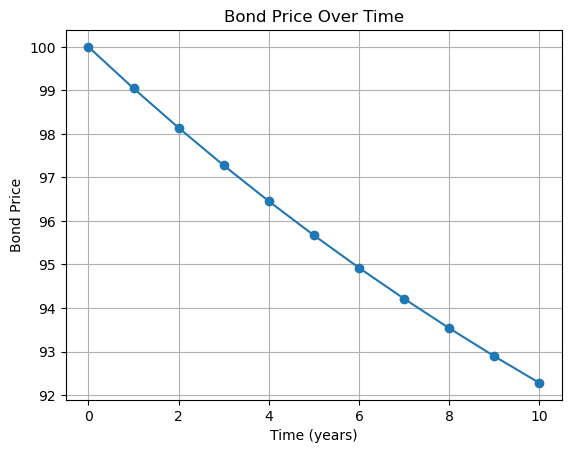

In [10]:
def bond_price(coupon, yield_rate, face_value, years_to_maturity):
    price = 0
    for t in range(1, years_to_maturity + 1):
        price += coupon / (1 + yield_rate) ** t
    price += face_value / (1 + yield_rate) ** years_to_maturity
    return price

# Task 1: Compute the bond price at time t = 0, i.e., P0(10).
coupon = 4
yield_rate = 0.05
face_value = 100
years_to_maturity = 10
P0_10 = bond_price(coupon, yield_rate, face_value, years_to_maturity)
print("Bond price at time t = 0 (P0(10)): $", round(P0_10, 2))

# Task 2: Compute P5(10), i.e., the bond price at the beginning of year five after receiving the fifth coupon payment.
years_passed = 5
remaining_years = years_to_maturity - years_passed
P5_10 = bond_price(coupon, yield_rate, face_value, remaining_years)
print("Bond price at the beginning of year 5 (P5(10)): $", round(P5_10, 2))

# Task 3: Compute Pt(10) for t = 0, 1, 2, ..., 10.
import matplotlib.pyplot as plt

years = list(range(years_to_maturity + 1))
prices = [bond_price(coupon, yield_rate, face_value, t) for t in years]

plt.plot(years, prices, marker='o')
plt.title('Bond Price Over Time')
plt.xlabel('Time (years)')
plt.ylabel('Bond Price')
plt.grid(True)
plt.show()


In [11]:
prices

[100.0,
 99.04761904761905,
 98.140589569161,
 97.2767519706295,
 96.45404949583762,
 95.67052332936916,
 94.92430793273253,
 94.2136266026024,
 93.53678724057372,
 92.89217832435592,
 92.27826507081517]

In [12]:
coupon = 4
yield_rate = 0.05
face_value = 100
years_to_maturity = 10

calculated_prices = [bond_price(coupon, yield_rate, face_value, t) for t in range(1, years_to_maturity + 1)]

provided_prices = [99.04761904761905, 98.140589569161, 97.2767519706295, 96.45404949583762, 95.67052332936916, 
                   94.92430793273253, 94.2136266026024, 93.53678724057372, 92.89217832435592, 92.27826507081517]

for i in range(len(provided_prices)):
    print(f"Time {i+1}: Calculated Price: {calculated_prices[i]}, Provided Price: {provided_prices[i]}")


Time 1: Calculated Price: 99.04761904761905, Provided Price: 99.04761904761905
Time 2: Calculated Price: 98.140589569161, Provided Price: 98.140589569161
Time 3: Calculated Price: 97.2767519706295, Provided Price: 97.2767519706295
Time 4: Calculated Price: 96.45404949583762, Provided Price: 96.45404949583762
Time 5: Calculated Price: 95.67052332936916, Provided Price: 95.67052332936916
Time 6: Calculated Price: 94.92430793273253, Provided Price: 94.92430793273253
Time 7: Calculated Price: 94.2136266026024, Provided Price: 94.2136266026024
Time 8: Calculated Price: 93.53678724057372, Provided Price: 93.53678724057372
Time 9: Calculated Price: 92.89217832435592, Provided Price: 92.89217832435592
Time 10: Calculated Price: 92.27826507081517, Provided Price: 92.27826507081517
